### **ÏΩîÎìú Íµ¨Îèô Ï†ÑÏóê Íº≠ Ï£ºÏÑùÌï¥Ï†úÌïòÍ≥† ÏÑ§ÏπòÌï¥Ï£ºÏÑ∏Ïöî! ÏÑ§Ïπò ÌõÑÏóêÎäî Ï£ºÏÑù Ï≤òÎ¶¨ Í∂åÏû•**

In [2]:
# # !pip show scipy
# # !pip install nltk
# # !pip install pandas
# # !pip install contractions
# import nltk # ÏàòÏ†ï Í∞êÏÇ¨Ìï©ÎãàÎã§~
# nltk.download('punkt') # Ïò§Îûò Í±∏Î¶º..
# nltk.download('omw-1.4')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# # !pip install pyLDAvis
# !pip install gensim
# !pip install scikit-learn

### ÏÇ¨Ïö© ÎùºÏù¥Î∏åÎü¨Î¶¨Îì§

In [4]:
import re
import os
import nltk
import string
import gensim
import pyLDAvis
import numpy as np
import contractions
import pandas as pd
from tqdm import tqdm
from collections import Counter
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pyLDAvis.gensim as gensimvis
from matplotlib import pyplot as plt
from gensim import corpora, models
from gensim.models import doc2vec
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
from gensim.models.doc2vec import TaggedDocument
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None) # Pandas Ï†ÑÏ≤¥ Ïó¥ ÌôïÏù∏
pd.set_option('display.max_rows', None) # Pandas Ï†ÑÏ≤¥ Ìñâ ÌôïÏù∏

### 1. Îç∞Ïù¥ÌÑ∞ Î°úÎî©

In [6]:
df = pd.read_csv("./1. Data/LG_Flipkart_Amazon_Total.csv") # Î°úÎìúÌï† Îç∞Ïù¥ÌÑ∞Ïùò (ÏÉÅÎåÄ or Ï†àÎåÄ) Í≤ΩÎ°úÎ•º ÏßÄÏ†ï
df_original = df
df.head()

Unnamed: 0                                               text  star
0           0  Waste of money . AC not working till one month...     1
1           1  I purchased this LG A. C. on 17 April 23..The ...     1
2           2  If you want to buy a white showpiece for your ...     1
3           3  Totally waste of money. company is not refund ...     1
4           4  This model don't have 4 way swing, it's actual...     1

In [7]:
# Ï∞®ÌõÑ Î∂ÑÏÑùÌï† ÏõêÎ≥∏ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ïª¨ÎüºÎ™Ö Ï†ÄÏû•
df_original_column = "text"

#### ÏòµÏÖò) Î≥ÑÏ†ê, ÏßÄÏó≠ Îì±ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÌïÑÌÑ∞ÎßÅÌïòÏã§ Î∂ÑÎì§ÏùÄ ÏïÑÎûòÏóê ÏΩîÎìú Ï∂îÍ∞ÄÌï¥ÏÑú ÏßÑÌñâ Î∞îÎûçÎãàÎã§

In [9]:
# df = df[df["star"] == 5] # ÏòàÏãú. Î≥ÑÏ†êÏúºÎ°ú Î∂ÑÎ•òÌï† Í≤ΩÏö∞
# df.head()

### 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
1. Í≤∞Ï∏° Îç∞Ïù¥ÌÑ∞ Ïó¨Î∂Ä ÌôïÏù∏
1-2. Í≤∞Ï∏° Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏Ïãú Îã§Î•∏ Îç∞Ïù¥ÌÑ∞(Í≥µÎ∞±Ïù¥ÎÇò 0 Îì±)Î°ú ÎåÄÏ≤¥
2. Ïù¥Î™®ÏßÄ Ï†úÍ±∞ -> ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ ÏãúÏûë
3. ÏÜåÎ¨∏Ïûê Î≥ÄÌôò 
4. ÏàòÏ∂ïÌòï ÌôïÏû•
5. Íµ¨ÎëêÏ†ê Ï†úÍ±∞
6. Î∂àÏö©Ïñ¥ Ï†úÍ±∞
7. ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú
8. Îã®Ïùº Í∏ÄÏûê Ï†úÍ±∞
9. Ïà´Ïûê Ï†úÍ±∞

---
- ÌäπÏ†ï Îç∞Ïù¥ÌÑ∞Îßå Ï†ÑÏ≤òÎ¶¨Î•º ÏõêÌï† Í≤ΩÏö∞ ÏΩîÎìú ÏàòÏ†ïÌï¥ÏÑú ÏÇ¨Ïö©Ìï¥Ï£ºÏÑ∏Ïöî! (Ïòà. df['ÌäπÏ†ïÏó¥'])

In [11]:
# Î°úÎî©Ìïú Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥ ÌôïÏù∏
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8168 entries, 0 to 8167
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8168 non-null   int64 
 1   text        8111 non-null   object
 2   star        8168 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 191.6+ KB


#### 1) Í≤∞Ï∏° Îç∞Ïù¥ÌÑ∞ Ïó¨Î∂Ä ÌôïÏù∏

In [13]:
df.isnull().sum()

Unnamed: 0     0
text          57
star           0
dtype: int64

#### 1-2) Í≤∞Ï∏° Îç∞Ïù¥ÌÑ∞ ÎåÄÏ≤¥
- ÏûÑÏãú Î∞©Ïïà

In [15]:
df = df.fillna('') # Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Í≤ΩÏö∞
df.isnull().sum() # Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞ Ïó¨Î∂Ä Ïû¨ÌôïÏù∏

Unnamed: 0    0
text          0
star          0
dtype: int64

#### 2) Ïù¥Î™®ÏßÄ Ï†úÍ±∞
- ÏòÅÏñ¥ Ï†úÏô∏ Ïñ∏Ïñ¥Îì§ÎèÑ Ï†úÍ±∞?
  - ÏïÑÏä§ÌÇ§(American ~) ÏΩîÎìúÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ï†úÍ±∞ÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Îã§Î•∏ Ïñ∏Ïñ¥Îì§ÎèÑ Ìï®Íªò Ï†úÍ±∞ÎêòÎäî Í≤ÉÏúºÎ°ú Ï∂îÏ†ï

In [17]:
# ÌÖçÏä§Ìä∏ÏóêÏÑú Ïù¥Î™®ÏßÄÎ•º Ï†úÍ±∞ÌïòÎäî Ìï®Ïàò
# ÏïÑÏä§ÌÇ§ ÏΩîÎìúÎ°ú Î≥ÄÌôò ÌõÑ Ï†úÍ±∞
def rmEmoji_ascii(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

# DataFrameÏùò Î™®Îì† Î¨∏ÏûêÏó¥Ïóê Ï†ÅÏö©
def df_remove_emoji(df):
    return df.map(lambda x: rmEmoji_ascii(x) if isinstance(x, str) else x)

In [18]:
# Before
df.head()

Unnamed: 0                                               text  star
0           0  Waste of money . AC not working till one month...     1
1           1  I purchased this LG A. C. on 17 April 23..The ...     1
2           2  If you want to buy a white showpiece for your ...     1
3           3  Totally waste of money. company is not refund ...     1
4           4  This model don't have 4 way swing, it's actual...     1

In [19]:
# After
df = df_remove_emoji(df)
df.head()

Unnamed: 0                                               text  star
0           0  Waste of money . AC not working till one month...     1
1           1  I purchased this LG A. C. on 17 April 23..The ...     1
2           2  If you want to buy a white showpiece for your ...     1
3           3  Totally waste of money. company is not refund ...     1
4           4  This model don't have 4 way swing, it's actual...     1

#### 3) ÏÜåÎ¨∏Ïûê Î≥ÄÌôò

In [21]:
# DataFrameÏùò Î™®Îì† Ïó¥Ïóê ÎåÄÌï¥ Î¨∏ÏûêÏó¥ÏùÑ ÏÜåÎ¨∏ÏûêÎ°ú Î≥ÄÌôòÌïòÎäî Ìï®Ïàò
# Î¨∏ÏûêÏó¥Ïù¥ ÏïÑÎãå Í≤ΩÏö∞Îäî Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ
def df_lowercase(df):
    return df.map(lambda x: x.lower() if isinstance(x, str) else x)

In [22]:
# Before
df.head()

Unnamed: 0                                               text  star
0           0  Waste of money . AC not working till one month...     1
1           1  I purchased this LG A. C. on 17 April 23..The ...     1
2           2  If you want to buy a white showpiece for your ...     1
3           3  Totally waste of money. company is not refund ...     1
4           4  This model don't have 4 way swing, it's actual...     1

In [23]:
# After
df = df_lowercase(df)
df.head()

Unnamed: 0                                               text  star
0           0  waste of money . ac not working till one month...     1
1           1  i purchased this lg a. c. on 17 april 23..the ...     1
2           2  if you want to buy a white showpiece for your ...     1
3           3  totally waste of money. company is not refund ...     1
4           4  this model don't have 4 way swing, it's actual...     1

#### 4) ÏàòÏ∂ïÌòï ÌôïÏû•
- don't -> do not, aren't -> are not, etc 

In [25]:
# DataFrameÏùò Î™®Îì† Î¨∏ÏûêÏó¥ Ïó¥ÏóêÏÑú ÏàòÏ∂ïÌòïÏùÑ ÌôïÏû•ÌïòÎäî Ìï®Ïàò.
# Î¨∏ÏûêÏó¥Ïù¥ ÏïÑÎãå Í≤ΩÏö∞Îäî Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ
def df_expand_contractions(df):
     return df.map(lambda x: contractions.fix(x) if isinstance(x, str) else x)

In [26]:
# Before
df.head()

Unnamed: 0                                               text  star
0           0  waste of money . ac not working till one month...     1
1           1  i purchased this lg a. c. on 17 april 23..the ...     1
2           2  if you want to buy a white showpiece for your ...     1
3           3  totally waste of money. company is not refund ...     1
4           4  this model don't have 4 way swing, it's actual...     1

In [27]:
# After
df = df_expand_contractions(df)
df.head()

Unnamed: 0                                               text  star
0           0  waste of money . ac not working till one month...     1
1           1  i purchased this lg a. c. on 17 april 23..the ...     1
2           2  if you want to buy a white showpiece for your ...     1
3           3  totally waste of money. company is not refund ...     1
4           4  this model do not have 4 way swing, it is actu...     1

#### 5) Íµ¨ÎëêÏ†ê Ï†úÍ±∞
- ?,!. Í≥º Í∞ôÏù¥ ÌÖçÏä§Ìä∏ Î∂ÑÏÑùÏóê Î∂àÌïÑÏöîÌïú ÏöîÏÜåÎì§ Ï†úÍ±∞
- ÌïÑÏöîÏãú, Ìï¥Îãπ Î∂ÄÎ∂ÑÏùÄ ÏùºÎ∂Ä Îç∞Ïù¥ÌÑ∞Î•º Ï†úÏô∏ÌïòÍ≥† Ï†ÅÏö©ÎêòÎèÑÎ°ù ÏàòÏ†ïÌï¥ÏÑú ÏÇ¨Ïö© ÏöîÎßù..(ÎÇ†Ïßú, Î™®Îç∏Î™Ö Îì±)

In [29]:
def df_remove_punctuation(df):
    return df.map(lambda x: x.translate(str.maketrans('', '', string.punctuation)) if isinstance(x, str) else x)

In [30]:
df.head()

Unnamed: 0                                               text  star
0           0  waste of money . ac not working till one month...     1
1           1  i purchased this lg a. c. on 17 april 23..the ...     1
2           2  if you want to buy a white showpiece for your ...     1
3           3  totally waste of money. company is not refund ...     1
4           4  this model do not have 4 way swing, it is actu...     1

In [31]:
df = df_remove_punctuation(df)
df.head()

Unnamed: 0                                               text  star
0           0  waste of money  ac not working till one month ...     1
1           1  i purchased this lg a c on 17 april 23the most...     1
2           2  if you want to buy a white showpiece for your ...     1
3           3  totally waste of money company is not refund m...     1
4           4  this model do not have 4 way swing it is actua...     1

#### 6) Î∂àÏö©Ïñ¥ Ï†úÍ±∞
- nltk Î∂àÏö©Ïñ¥ ÏÇ¨Ï†Ñ Ï†ÅÏö©

In [33]:
# Before
df.head()

Unnamed: 0                                               text  star
0           0  waste of money  ac not working till one month ...     1
1           1  i purchased this lg a c on 17 april 23the most...     1
2           2  if you want to buy a white showpiece for your ...     1
3           3  totally waste of money company is not refund m...     1
4           4  this model do not have 4 way swing it is actua...     1

In [34]:
# Î∂àÏö©Ïñ¥ Î™©Î°ù Í∞ÄÏ†∏Ïò§Í∏∞
stop_words = set(stopwords.words('english'))

In [35]:
# Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Ìï®Ïàò
def remove_stopwords(text):
    if isinstance(text, str):
        words = word_tokenize(text)  # ÌÖçÏä§Ìä∏Î•º Îã®Ïñ¥Î°ú ÌÜ†ÌÅ∞Ìôî
        filtered_words = [word for word in words if word.lower() not in stop_words]  # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
        return ' '.join(filtered_words)  # ÌïÑÌÑ∞ÎßÅÎêú Îã®Ïñ¥Îì§ÏùÑ Îã§Ïãú ÌïòÎÇòÏùò Î¨∏ÏûêÏó¥Î°ú Í≤∞Ìï©
    else:
        return text  # Î¨∏ÏûêÏó¥Ïù¥ ÏïÑÎãå Í≤ΩÏö∞ Í∑∏ÎåÄÎ°ú Î∞òÌôò

def df_remove_stopwords(df):
    return df.map(remove_stopwords)

In [36]:
# Before
df.head()

Unnamed: 0                                               text  star
0           0  waste of money  ac not working till one month ...     1
1           1  i purchased this lg a c on 17 april 23the most...     1
2           2  if you want to buy a white showpiece for your ...     1
3           3  totally waste of money company is not refund m...     1
4           4  this model do not have 4 way swing it is actua...     1

In [37]:
# After
df = df_remove_stopwords(df)
df.head()

Unnamed: 0                                               text  star
0           0  waste money ac working till one month installa...     1
1           1  purchased lg c 17 april 23the horrible experie...     1
2           2  want buy white showpiece bedroom go ahead othe...     1
3           3  totally waste money company refund money per p...     1
4           4  model 4 way swing actual ton 13 cooling capaci...     1

#### 7) ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú
- Îã®Ïñ¥ ÏõêÌòï Ï∂îÏ∂ú
  - children -> child, went -> go, etc

In [39]:
# nltkÏùò pos_tagÏôÄ wordnetÏùò ÌÉúÍ∑∏ Îß§Ìïë Ìï®Ïàò
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Î™®Îì† Î¨∏ÏûêÏó¥Ïóê ÎåÄÌï¥ ÌëúÏ†úÏñ¥ Ï∂îÏ∂úÏùÑ ÏàòÌñâÌïòÎäî Ìï®Ïàò
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer() # ÌÖçÏä§Ìä∏Î•º ÌÜ†ÌÅ∞Ìôî
    tokens = word_tokenize(text) # ÌíàÏÇ¨ ÌÉúÍπÖ
    tagged_tokens = nltk.pos_tag(tokens) # Í∞Å Îã®Ïñ¥Î•º ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú (ÌíàÏÇ¨ Ï†ïÎ≥¥ Í≥†Î†§)
    lemmatized_tokens = []
    for token, tag in tagged_tokens:
        wordnet_pos = get_wordnet_pos(tag) or wordnet.NOUN  # Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Î™ÖÏÇ¨ Ï≤òÎ¶¨
        lemmatized_tokens.append(lemmatizer.lemmatize(token, pos=wordnet_pos))
    return ' '.join(lemmatized_tokens)

# DataFrameÏùò Î™®Îì† Î¨∏ÏûêÏó¥Ïóê ÎåÄÌï¥ lemmatize_text Ìï®Ïàò ÏàòÌñâ
# Î¨∏ÏûêÏó¥Ïù¥ ÏïÑÎãå Í≤ΩÏö∞Îäî Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ
def df_lemmatize(df):
    return df.map(lambda x: lemmatize_text(x) if isinstance(x, str) else x)

In [40]:
df.head()

Unnamed: 0                                               text  star
0           0  waste money ac working till one month installa...     1
1           1  purchased lg c 17 april 23the horrible experie...     1
2           2  want buy white showpiece bedroom go ahead othe...     1
3           3  totally waste money company refund money per p...     1
4           4  model 4 way swing actual ton 13 cooling capaci...     1

In [41]:
# After
df = df_lemmatize(df)
df.head()

Unnamed: 0                                               text  star
0           0  waste money ac work till one month installatio...     1
1           1  purchase lg c 17 april 23the horrible experien...     1
2           2  want buy white showpiece bedroom go ahead othe...     1
3           3  totally waste money company refund money per p...     1
4           4  model 4 way swing actual ton 13 cooling capaci...     1

#### 8) Ïà´Ïûê Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞
- ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÌïÑÏöîÏãú Ìï¥Îãπ Î∂ÄÎ∂ÑÏùÄ ÏùºÎ∂Ä Îç∞Ïù¥ÌÑ∞Î•º Ï†úÏô∏ÌïòÍ≥† Ï†ÅÏö©ÎêòÎèÑÎ°ù ÏàòÏ†ïÌï¥ÏÑú ÏÇ¨Ïö© ÏöîÎßù..(ÎÇ†Ïßú, Î™®Îç∏Î™Ö Îì±)

In [43]:
# Ïà´Ïûê Ï†úÍ±∞ Ìï®Ïàò
def remove_numbers_from_text(text):
    cleaned_text = re.sub(r'\d+', '', text) # Ïà´ÏûêÎ•º Ï†úÍ±∞
    
    # Ï§ëÎ≥µÎêú Í≥µÎ∞± Ï†úÍ±∞ Î∞è ÌÖçÏä§Ìä∏ Ï†ïÎ¶¨
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text if cleaned_text else ""

def df_remove_numbers(df):
    return df.map(lambda x: remove_numbers_from_text(x) if isinstance(x, str) else x)

In [44]:
df.head()

Unnamed: 0                                               text  star
0           0  waste money ac work till one month installatio...     1
1           1  purchase lg c 17 april 23the horrible experien...     1
2           2  want buy white showpiece bedroom go ahead othe...     1
3           3  totally waste money company refund money per p...     1
4           4  model 4 way swing actual ton 13 cooling capaci...     1

In [45]:
df = df_remove_numbers(df)
df.head()

Unnamed: 0                                               text  star
0           0  waste money ac work till one month installatio...     1
1           1  purchase lg c april the horrible experience ev...     1
2           2  want buy white showpiece bedroom go ahead othe...     1
3           3  totally waste money company refund money per p...     1
4           4  model way swing actual ton cooling capacity w ...     1

#### 9) ÏùòÎØ∏ ÏóÜÎäî Îã®Ïùº Í∏ÄÏûê Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞

In [47]:
# Ï†ïÍ∑ú ÌëúÌòÑÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ìïú Í∏ÄÏûê Îã®Ïñ¥Î•º Ï†úÍ±∞
def remove_single_characters(text):
    cleaned_text = re.sub(r'\b\w{1}\b', '', text)
    # Ï§ëÎ≥µÎêú Í≥µÎ∞± Ï†úÍ±∞
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text

# ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú DataFrameÏóê Ï†ÅÏö©
def df_remove_single_characters(df):
    return df.map(lambda x: remove_single_characters(x) if isinstance(x, str) else x)

In [48]:
# Before
df.head()

Unnamed: 0                                               text  star
0           0  waste money ac work till one month installatio...     1
1           1  purchase lg c april the horrible experience ev...     1
2           2  want buy white showpiece bedroom go ahead othe...     1
3           3  totally waste money company refund money per p...     1
4           4  model way swing actual ton cooling capacity w ...     1

In [49]:
# After
df = df_remove_single_characters(df)
df.head()

Unnamed: 0                                               text  star
0           0  waste money ac work till one month installatio...     1
1           1  purchase lg april the horrible experience ever...     1
2           2  want buy white showpiece bedroom go ahead othe...     1
3           3  totally waste money company refund money per p...     1
4           4  model way swing actual ton cooling capacity ch...     1

#### ÏòµÏÖò) ÌäπÏ†ï Îã®Ïñ¥Îì§ÏùÑ Ï†úÏô∏ÌïòÍ≥† Ïã∂ÏùÑ Í≤ΩÏö∞
- +) ÌäπÏ†ï ÌíàÏÇ¨Îßå Ï∂îÏ∂úÌïòÍ≥†Ìåå! -> ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú Ìï®Ïàò ÏùëÏö©ÌïòÎ©¥ Îê†ÏßÄÎèÑ..?
- ÌëúÏ†úÏñ¥ Ï∂îÏ∂úÏù¥ ÏùºÎ∂Ä ÎØ∏Ìù°

In [51]:
# ÏòàÏãú ÏΩîÎìú
# stop_words.update(['lg','flipkart']) # Î∂àÏö©Ïñ¥ ÏÇ¨Ï†Ñ ÏóÖÎç∞Ïù¥Ìä∏ 
# df = df_remove_stopwords(df)
# df.head()

### 3. ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÜ†ÌÅ∞Ìôî

In [53]:
# ÌÖçÏä§Ìä∏Î•º ÌÜ†ÌÅ∞ÌôîÌïòÎäî Ìï®Ïàò
def tokenize_text(text):
    
    return word_tokenize(text)

# DataFrameÏùò Î™®Îì† Î¨∏ÏûêÏó¥ÏùÑ ÌÜ†ÌÅ∞ÌôîÌïòÎäî Ìï®Ïàò.
def df_tokenize(df):
    return df.map(lambda x: tokenize_text(x) if isinstance(x, str) else x)

In [54]:
df.head()

Unnamed: 0                                               text  star
0           0  waste money ac work till one month installatio...     1
1           1  purchase lg april the horrible experience ever...     1
2           2  want buy white showpiece bedroom go ahead othe...     1
3           3  totally waste money company refund money per p...     1
4           4  model way swing actual ton cooling capacity ch...     1

In [55]:
df = df_tokenize(df)
df.head()

Unnamed: 0                                               text  star
0           0  [waste, money, ac, work, till, one, month, ins...     1
1           1  [purchase, lg, april, the, horrible, experienc...     1
2           2  [want, buy, white, showpiece, bedroom, go, ahe...     1
3           3  [totally, waste, money, company, refund, money...     1
4           4  [model, way, swing, actual, ton, cooling, capa...     1

#### Ï∂îÍ∞Ä) Ï∞®ÌõÑ ÏõêÎ≥∏ ÌÖçÏä§Ìä∏ ÎπÑÍµê ÏúÑÌï¥ ÏõêÎ≥∏ ÌÖçÏä§Ìä∏ Ïª¨Îüº Ï∂îÍ∞Ä

In [57]:
df['original'] = df_original[df_original_column]
df.head()

Unnamed: 0                                               text  star  \
0           0  [waste, money, ac, work, till, one, month, ins...     1   
1           1  [purchase, lg, april, the, horrible, experienc...     1   
2           2  [want, buy, white, showpiece, bedroom, go, ahe...     1   
3           3  [totally, waste, money, company, refund, money...     1   
4           4  [model, way, swing, actual, ton, cooling, capa...     1   

                                            original  
0  Waste of money . AC not working till one month...  
1  I purchased this LG A. C. on 17 April 23..The ...  
2  If you want to buy a white showpiece for your ...  
3  Totally waste of money. company is not refund ...  
4  This model don't have 4 way swing, it's actual...

### 4. ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏÑ†Ï†ï

#### ‚ú®Î∂ÑÏÑù Î∞è Î≤°ÌÑ∞Ìôî ÏßÑÌñâÌï† ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ïó¥ ÏÑ†ÌÉù

In [60]:
column_name = "text" # Î∂ÑÏÑù ÏßÑÌñâÌï† ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ïó¥ ÏÑ†ÌÉù
display(df.head()) # Ïó¥ Ïù¥Î¶Ñ ÌôïÏù∏Ïö©

Unnamed: 0                                               text  star  \
0           0  [waste, money, ac, work, till, one, month, ins...     1   
1           1  [purchase, lg, april, the, horrible, experienc...     1   
2           2  [want, buy, white, showpiece, bedroom, go, ahe...     1   
3           3  [totally, waste, money, company, refund, money...     1   
4           4  [model, way, swing, actual, ton, cooling, capa...     1   

                                            original  
0  Waste of money . AC not working till one month...  
1  I purchased this LG A. C. on 17 April 23..The ...  
2  If you want to buy a white showpiece for your ...  
3  Totally waste of money. company is not refund ...  
4  This model don't have 4 way swing, it's actual...

#### 1) Î≤°ÌÑ∞Ìôî
- TD-IDF Vectorization

In [62]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(df[f'{column_name}'].apply(lambda x: ' '.join(x)))

#### 2) Elbow Method
- ÏµúÏ†ÅÏùò K Í∞í ÌÉêÏÉâ

In [64]:
# sse = []
# k_values = range(1, 10)  # ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò 1ÏóêÏÑú 9ÍπåÏßÄ Ïã§Ìóò

# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
#     kmeans.fit(X)
#     sse.append(kmeans.inertia_)  # SSE Í∞íÏùÑ Ï∂îÍ∞Ä

# # Elbow Plot
# plt.figure(figsize=(10, 7))
# plt.plot(k_values, sse, marker='o')
# plt.title('Elbow Method for Optimal k')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Sum of Squared Errors (SSE)')
# plt.show()

#### 3) K-Means Clustering
- Elbow MethodÎ°ú Ï∞æÏùÄ K Í∞í Ï†ÅÏö© ÌõÑ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ

In [66]:
num_clusters = 4  # ÏõêÌïòÎäî ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init = 10)
df['cluster'] = kmeans.fit_predict(X)

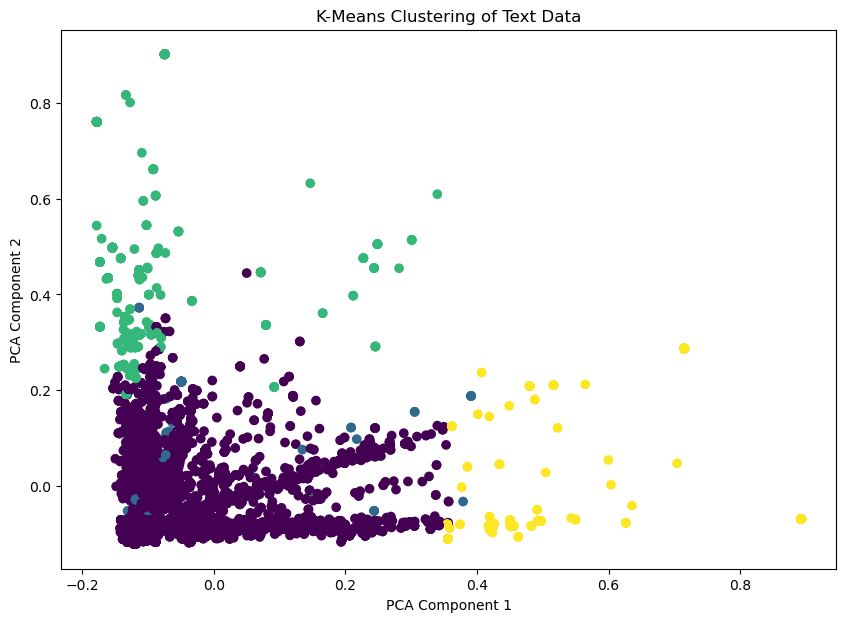

In [67]:
# Í≤∞Í≥º ÏãúÍ∞ÅÌôî (PCAÎ°ú Ï∞®Ïõê Ï∂ïÏÜå)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df['cluster'], cmap='viridis')
plt.title('K-Means Clustering of Text Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [68]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º Ï∂úÎ†•
# print(df[[f'{column_name}', 'cluster']])

In [69]:
# Î∂ÑÏÑù ÏßÑÌñâÌï† Î¨∏ÏûêÏó¥ Ïª¨ÎüºÏùÑ Î¶¨Ïä§Ìä∏ÏóêÏÑú Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
df_temp = df.copy()
df_temp[f'{column_name}'] = df_temp[f'{column_name}'].apply(lambda x: ' '.join(x))

In [70]:
# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îã®Ïñ¥ ÎπàÎèÑ Í≥ÑÏÇ∞
terms = tfidf_vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

In [71]:
# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏúÑ Îã®Ïñ¥ Ï∂îÏ∂ú Î∞è ÎπàÎèÑÏàò Í≥ÑÏÇ∞
# num_terms = (ÏÉÅÏúÑ Îã®Ïñ¥ Ïàò)
def get_top_terms_per_cluster(num_terms=10):
    cluster_term_dict = {}
    
    for cluster_num in range(4):
        print(f"\nCluster {cluster_num} Top Terms:")
        cluster_docs = df_temp[df_temp['cluster'] == cluster_num][f'{column_name}']  # ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïú Î¨∏ÏÑúÎì§
        term_counts = {}
        
        for doc in cluster_docs:
            for term in doc.split():  # Î¨∏ÏûêÏó¥ÏùÑ Îã®Ïñ¥Î°ú ÎÇòÎàÑÍ∏∞
                if term in term_counts:
                    term_counts[term] += 1
                else:
                    term_counts[term] = 1
        
        top_terms = sorted(term_counts.items(), key=lambda item: item[1], reverse=True)[:num_terms]
        cluster_term_dict[cluster_num] = top_terms
        print(top_terms)
    
    return cluster_term_dict

top_terms_per_cluster = get_top_terms_per_cluster(num_terms=20)


Cluster 0 Top Terms:
[('lg', 2659), ('product', 2600), ('good', 1873), ('service', 1397), ('buy', 1384), ('tv', 1372), ('installation', 1231), ('ac', 1161), ('cool', 1038), ('quality', 1023), ('bad', 1011), ('time', 984), ('get', 971), ('machine', 940), ('work', 888), ('day', 822), ('amazon', 755), ('wash', 739), ('even', 730), ('use', 725)]

Cluster 1 Top Terms:
[('nice', 277), ('product', 116), ('good', 18), ('tv', 9), ('installation', 7), ('price', 6), ('lg', 6), ('picture', 6), ('quality', 6), ('go', 5), ('money', 5), ('service', 5), ('time', 5), ('value', 4), ('refrigerator', 4), ('pic', 4), ('high', 4), ('delivery', 4), ('performance', 4), ('thanks', 4)]

Cluster 2 Top Terms:
[('bad', 538), ('product', 236), ('experience', 80), ('quality', 75), ('service', 55), ('cool', 53), ('good', 52), ('lg', 50), ('installation', 41), ('buy', 40), ('ac', 35), ('picture', 23), ('tv', 23), ('ever', 22), ('customer', 18), ('work', 17), ('flipkart', 17), ('low', 16), ('poor', 16), ('also', 16)]


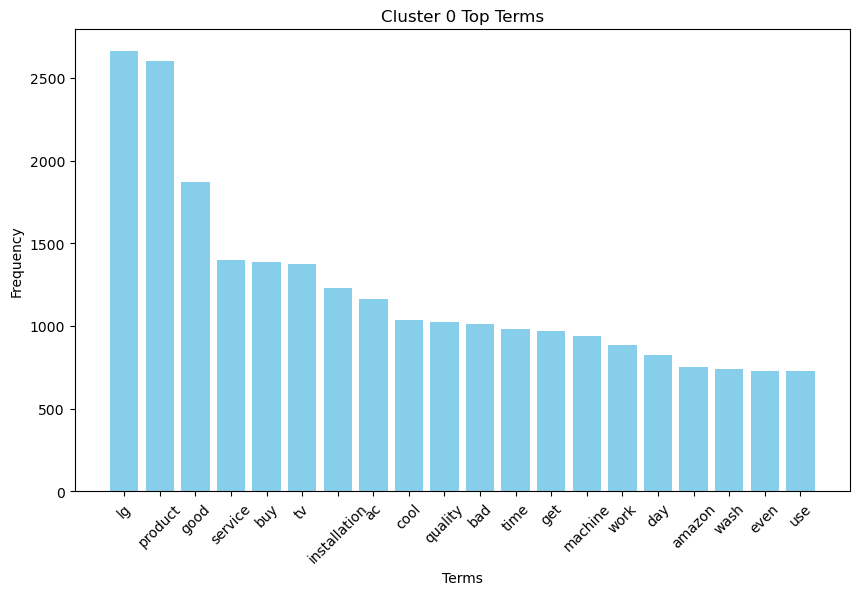

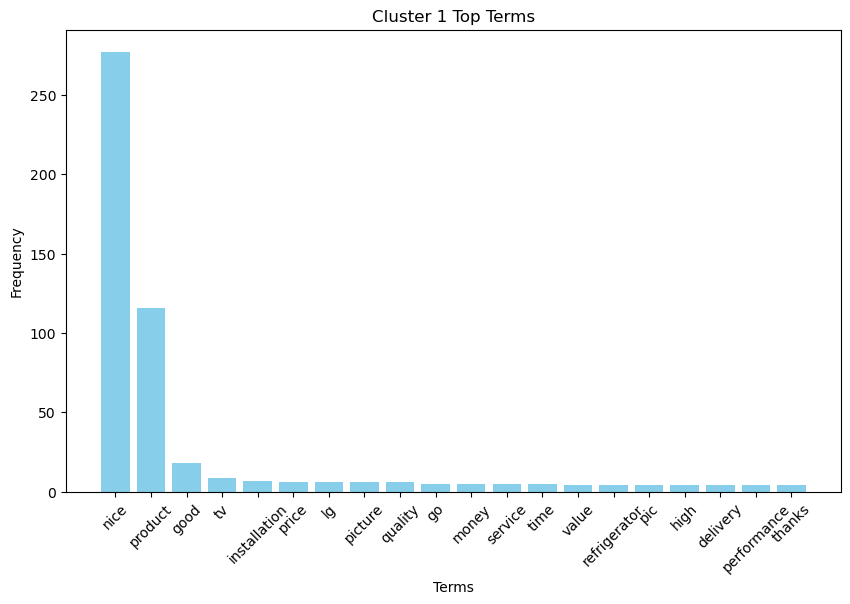

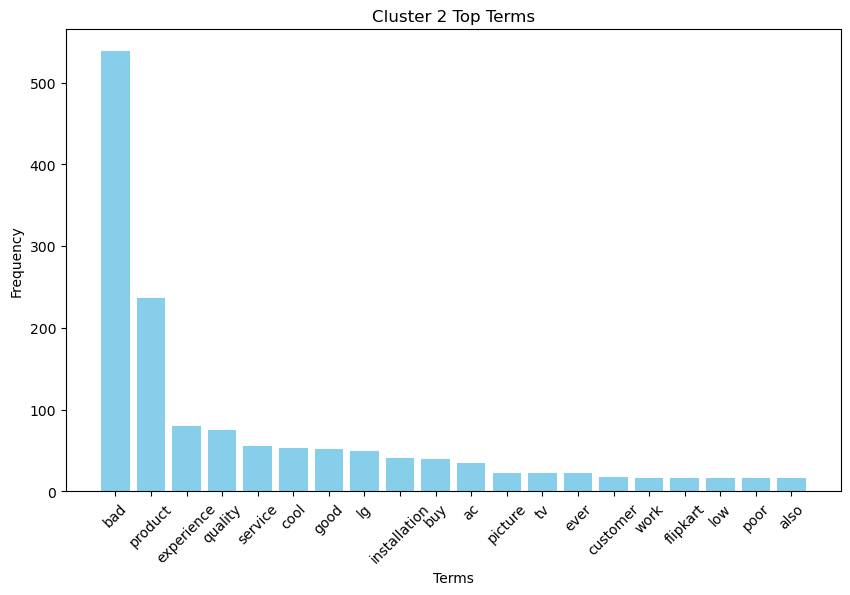

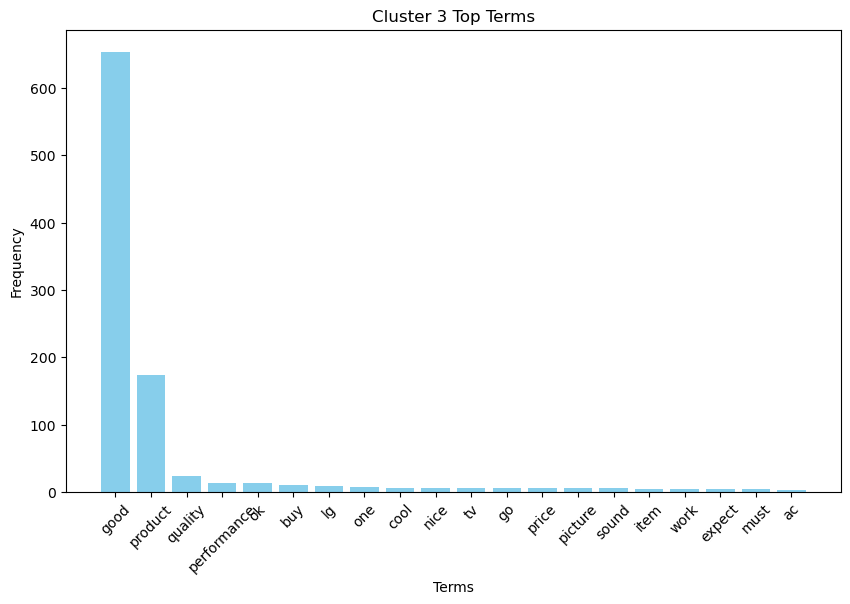

In [72]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏúÑ Îã®Ïñ¥ Î∞î Í∑∏ÎûòÌîÑ
def plot_top_terms_per_cluster(cluster_term_dict):
    for cluster_num, terms in cluster_term_dict.items():
        terms, frequencies = zip(*terms)  # Îã®Ïñ¥ÏôÄ ÎπàÎèÑÎ•º Î∂ÑÎ¶¨
        
        plt.figure(figsize=(10, 6))
        plt.bar(terms, frequencies, color='skyblue')
        plt.title(f'Cluster {cluster_num} Top Terms')
        plt.xlabel('Terms')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.show()

plot_top_terms_per_cluster(top_terms_per_cluster)

### 5. LDA Î∂ÑÏÑù
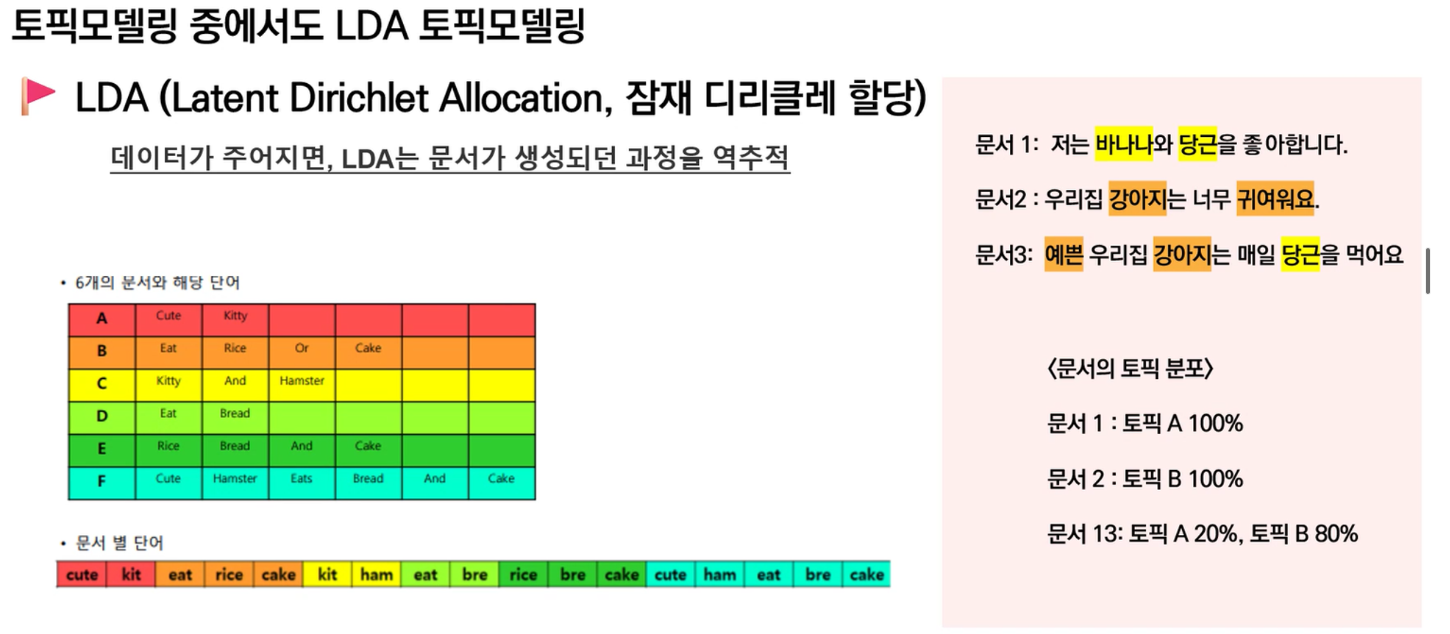

#### ‚ú®‚ú®Î∂ÑÏÑù ÏßÑÌñâÌï† ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏÑ†Ï†ï
- ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏÑ†Ï†ï ÌååÌä∏ÏóêÏÑú Î∂ÑÏÑùÌïú Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú! Ïó¨Í∏∞ÏÑú ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú LDA Î∂ÑÏÑù ÏßÑÌñâÌï† ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏÑ†Ï†ï!!
- Ìï¥Îãπ ÏΩîÎìúÎäî ÏòàÏãúÎ°ú 0Î≤àÏß∏ ÌÅ¥Îü¨Ïä§ÌÑ∞Î•º ÏÑ†ÌÉù
- ÎßåÏïΩ ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÎ•ò ÏóÜÏù¥ Î∞îÎ°ú LDA Î∂ÑÏÑùÏùÑ ÏßÑÌñâÌïòÍ≥† Ïã∂ÏúºÏãúÎã§Î©¥ '4. ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏÑ†Ï†ï'ÏùÑ Í±¥ÎÑàÎùÑÍ≥† df_cluster = df.copy()Î°ú ÏïÑÎûò ÏΩîÎìú ÏàòÏ†ï ÌõÑÏóê ÏßÑÌñâÌïòÏãúÎ©¥ Îê©ÎãàÎã§. 

In [75]:
df_cluster = df[df['cluster']==0].copy() # Ï∞∏Í≥† : https://emilkwak.github.io/pandas-dataframe-settingwithcopywarning
df_cluster.head()

Unnamed: 0                                               text  star  \
0           0  [waste, money, ac, work, till, one, month, ins...     1   
1           1  [purchase, lg, april, the, horrible, experienc...     1   
2           2  [want, buy, white, showpiece, bedroom, go, ahe...     1   
3           3  [totally, waste, money, company, refund, money...     1   
4           4  [model, way, swing, actual, ton, cooling, capa...     1   

                                            original  cluster  
0  Waste of money . AC not working till one month...        0  
1  I purchased this LG A. C. on 17 April 23..The ...        0  
2  If you want to buy a white showpiece for your ...        0  
3  Totally waste of money. company is not refund ...        0  
4  This model don't have 4 way swing, it's actual...        0

#### 1) Ï†ÑÏ≤¥ Îã®Ïñ¥Ïùò ÏÇ¨Ï†Ñ ÎßåÎì§Í≥† Í∞Å Î¨∏ÏÑúÏóê Îß§Ïπ≠
- ÏΩîÎìú Í∑∏ÎåÄÎ°ú Îî∞ÎùºÌñàÎäîÎç∞ Í∞Å Î¨∏ÏÑúÏóê Îß§Ïπ≠ÌïúÎã§Îäî ÎÇ¥Ïö©ÏùÄ Ïûò Î™®Î•¥Í≤†Ïñ¥Ïöî

In [77]:
all_documents=list(df_cluster[f'{column_name}']) # 'text' Ïª¨Îüº ÏßÄÏ†ï
dictionary=Dictionary(all_documents)
# dictionary.token2id # ÌôïÏù∏Ïö©

In [78]:
corpus=[]
for doc in all_documents:
    corpus.append(dictionary.doc2bow(doc))
corpus[0] #ID Í∞í, ÎπàÎèÑ

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 2),
 (13, 1),
 (14, 2),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 2),
 (19, 1)]

#### 2) LDA Î™®Îç∏ ÎßåÎì§Í∏∞

##### 2-1) LDA ÌÜ†ÌîΩÍ∞úÏàò ÏÑ†Ï†ï
-  perplexcity & coherence
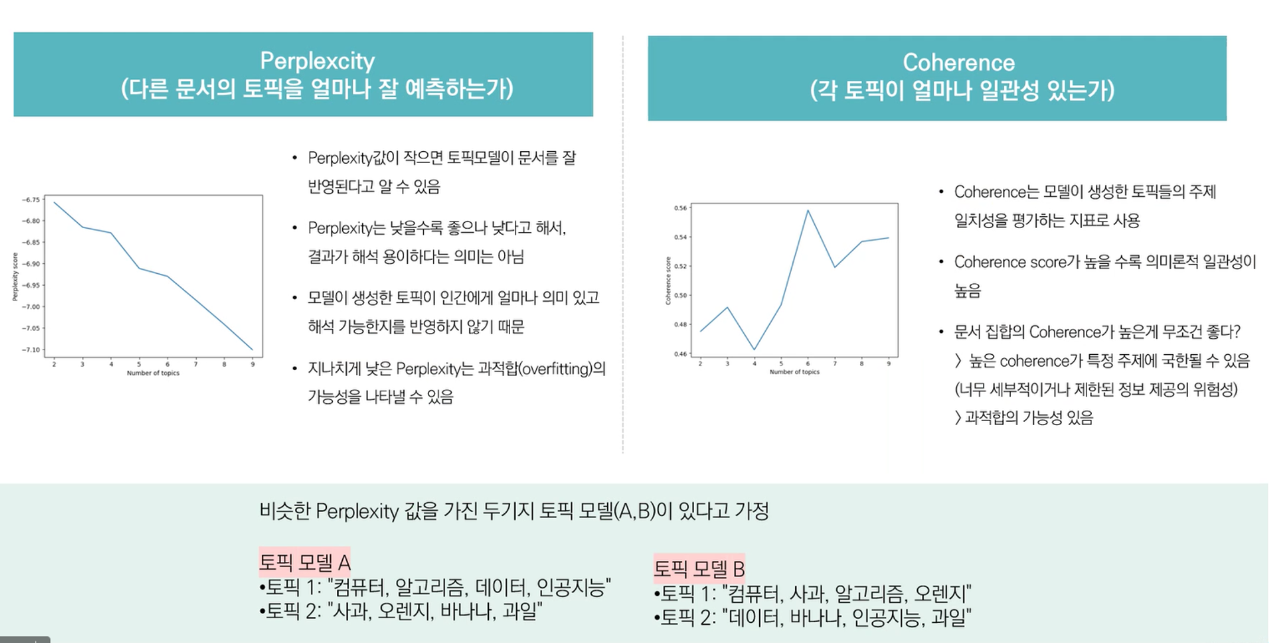
- ÌÜ†ÌîΩÍ∞úÏàò ÏÑ†Ï†ï Í∏∞Ï§Ä (Ïûò Í∏∞ÏñµÏù¥ ÏïàÎÇòÎäîÎç∞ Ïó¨Í∏∞ÏÑú ÎßêÌïòÎäî ÌÅ¥Îü¨Ïä§ÌÑ∞ÏàòÍ∞Ä ÌÜ†ÌîΩÍ∞úÏàòÎùºÎäî ÏùòÎØ∏Ïù¥ÏßÄ ÏïäÏùÑÍπåÌïòÎäî...)
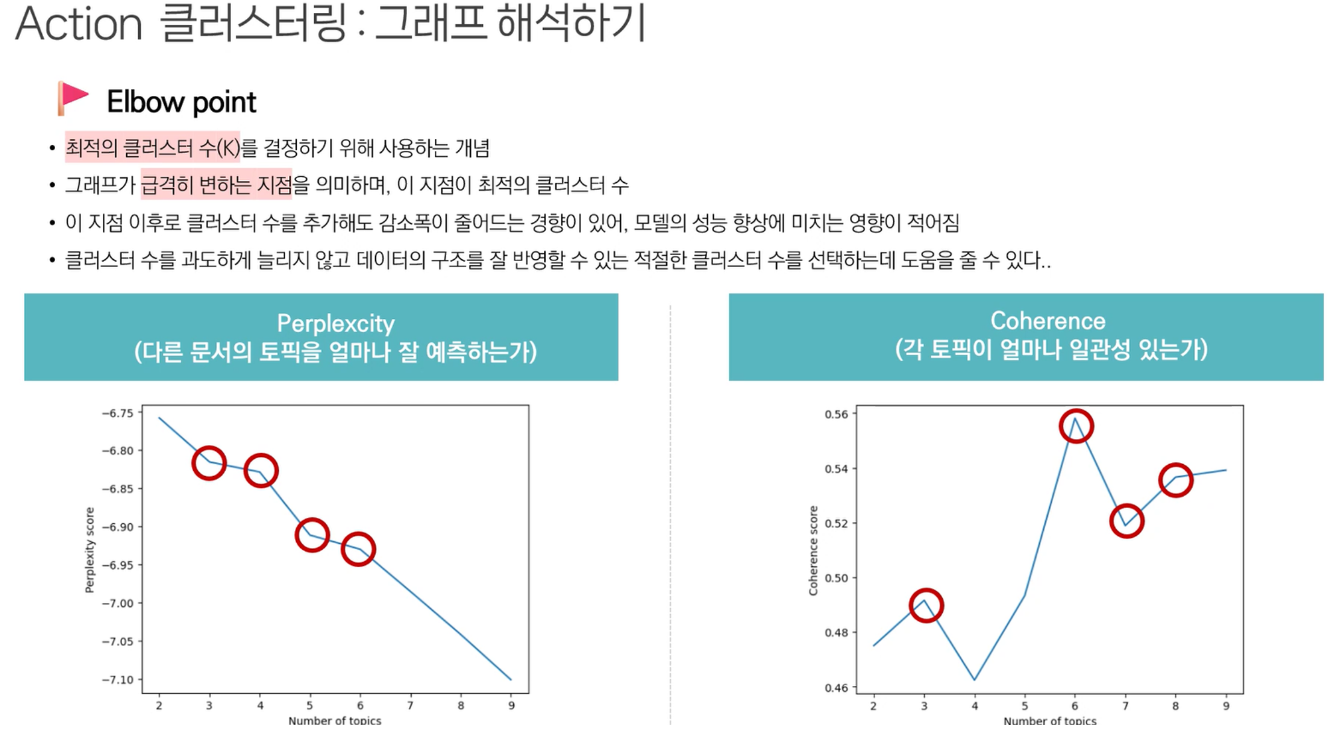

###### 2-1-1) Perplexity Í∑∏ÎûòÌîÑ ÎßåÎì§Í∏∞

In [82]:
# random_seed = 1 # (Î≥ÄÍ≤Ω ÏòµÏÖò) LDAÎäî ÌôïÎ•†Ìòï Î™®Îç∏Ïù¥Îùº ÎÇúÏàò ÌÜµÏ†ú ÌïÑÏöî. ÏûÑÏãúÏ†ÅÏúºÎ°ú 1 ÏßÄÏ†ï
# perplex_values=[]

# # (Î≥ÄÍ≤Ω ÏòµÏÖò) range(2,20)Ïùò Î≤îÏúÑÎ°ú LDA Î™®Îç∏ ÏÉùÏÑ± ÌõÑ perplexity Í∞íÎì§ Ï†ÄÏû•
# for i in range(2,20):
#     ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary, random_state=random_seed)
#     perp_v=ldamodel.log_perplexity(corpus) # Í≤∞Í≥ºÍ∞í
#     perplex_values.append(perp_v)

# # ÏãúÍ∞ÅÌôî
# x= range(2,20)
# plt.plot(x, perplex_values)
# plt.xlabel('Number of topics')
# plt.ylabel('Perplexity score')

###### 2-1-2) Coherence Í∑∏ÎûòÌîÑ ÎßåÎì§Í∏∞ -> ÏãúÍ∞ÑÏù¥ ÏÉÅÎãπÌûà ÏÜåÏöîÎêòÎãà Î≥º ÌïÑÏöî ÏóÜÏúºÎ©¥ Ï£ºÏÑù Ï≤òÎ¶¨ Ï∂îÏ≤ú

In [84]:
# random_seed = 1 # (Î≥ÄÍ≤Ω ÏòµÏÖò) LDAÎäî ÌôïÎ•†Ìòï Î™®Îç∏Ïù¥Îùº ÎÇúÏàò ÌÜµÏ†ú ÌïÑÏöî. ÏûÑÏãúÏ†ÅÏúºÎ°ú 1 ÏßÄÏ†ï
# cohearence_values=[]

# # (Î≥ÄÍ≤Ω ÏòµÏÖò) range(2,10)Ïùò Î≤îÏúÑÎ°ú LDA Î™®Îç∏ ÏÉùÏÑ± ÌõÑ coherence Í∞íÎì§ Ï†ÄÏû•
# for i in range(2,10):
#     ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
#     cohearence_model=CoherenceModel(model=ldamodel, texts=all_documents, dictionary=dictionary, topn=i)
#     cohearence_score=cohearence_model.get_coherence()
#     cohearence_values.append(cohearence_score)

# # ÏãúÍ∞ÅÌôî
# x=range(2,10)
# plt.plot(x, cohearence_values)
# plt.xlabel('Number of topics')
# plt.ylabel('Cohearence score')

##### 2-2) ÏÑ†Ï†ïÌïú ÌÜ†ÌîΩ Í∞úÏàòÎ°ú ActionÎÑòÎ≤Ñ Îß§Ïπ≠
- Ìï¥Îãπ ÏΩîÎìúÎäî ÏûÑÏùòÍ∞íÏúºÎ°ú 5Î•º ÏÑ†Ï†ï

In [86]:
topic_n = 6 # (ÌïÑÏàò Î≥ÄÍ≤Ω ÏòµÏÖò) ÏÑ†Ï†ïÌïú ÌÜ†ÌîΩ Í∞úÏàò
random_seed = 1
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = topic_n, id2word = dictionary, random_state = random_seed, passes=10, iterations=20)

In [87]:
action_align=[]

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label=[]
    value=[]

    for score in doc:
        label.append(score[0])
        value.append(score[1]) # label Í∞í, valueÍ∞í Î∂ÑÎ¶¨

    max_index=np.argmax(value)
    action_n=label[max_index]
    action_align.append(action_n)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6835/6835 [00:00<00:00, 10442.83it/s]


In [88]:
ldamodel.get_document_topics(corpus)[0]

[(1, 0.4509253), (3, 0.39986366), (4, 0.12829407)]

In [89]:
df_cluster['action_cluster'] = action_align

#### 3) LDA ÏãúÍ∞ÅÌôî (LDAvis)
- ÏõêÏùò ÌÅ¨Í∏∞ : ÌÜ†ÌîΩÏùò Îã®Ïñ¥Îì§Ïù¥ ÏñºÎßàÎÇò ÏÜçÌï¥ ÏûàÍ≥† Ïñ¥ÎñªÍ≤å Î∂ÑÌè¨ ÎêòÏñ¥ÏûàÎäîÏßÄ
- ÏõêÏùò Í±∞Î¶¨ : ÌÜ†ÌîΩ Í∞ÑÏùò Ïú†ÏÇ¨ÏÑ± (Îëê Í∞úÏùò ÏõêÏù¥ Í≤πÏπúÎã§Î©¥ , Îëê Í∞úÏùò ÌÜ†ÌîΩÏùÄ Ïú†ÏÇ¨Ìïú ÌÜ†ÌîΩÏù¥ÎùºÎäî ÏùòÎØ∏)
- Œª  =1 ÏùºÏàòÎ°ù,
ÌÜ†ÌîΩ Î≥ÑÎ°ú Í∞ÄÏû• ÏûêÏ£º Îì±Ïû•ÌïòÎäî Îã®Ïñ¥Îì§ÏùÑ Ïö∞ÏÑ†Ï†ÅÏúºÎ°ú ÌÇ§ÏõåÎìúÎ°ú ÏÑ†ÌÉùÌïúÎã§Îäî ÏùòÎØ∏
- Œª = 0 ÏùºÏàòÎ°ù,
ÌÜ†ÌîΩ Í∞ÑÏóê Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇòÎäî Îã®Ïñ¥Î•º ÏÑ†ÌÉùÌïúÎã§Îäî ÏùòÎØ∏ (Ìï¥Îãπ ÌÜ†ÌîΩÏóêÏÑú ÎßéÏù¥ Îì±Ïû•Ìïú Îã®Ïñ¥)

In [91]:
prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(prepared_data, './4. LDA_result/ldavis_actor_0.html') # htmlÎ°ú Ï†ÄÏû•
pyLDAvis.display(prepared_data)

##### 3-1 LDA Î∂ÑÏÑùÏùÑ ÏúÑÌïú ÌõÑÏûëÏóÖ
- LDAvis(ÏãúÍ∞ÅÌôî Í≤∞Í≥º)ÏôÄ LDAÎ™®Îç∏Ïùò ÌÜ†ÌîΩ ÎÑòÎ≤ÑÍ∞Ä Îã§Î•¥Í∏∞ ÎïåÎ¨∏Ïóê Ïù¥Î•º Îß§Ïπ≠ÌïòÎäî ÏûëÏóÖ
- LDAvis Í≤∞Í≥ºÏôÄ LDAÎ™®Îç∏Ïùò Í≤∞Í≥ºÎ•º Î≥¥Í≥† Îß§Ïπ≠
- Í∞êÏÑ± Î∂ÑÏÑùÏùÑ ÏúÑÌïú Îã®Í≥Ñ?Ïù∏ ÎìØÌïòÏßÄÎßå ÏùºÎã® ÏΩîÎìúÏóê Ìè¨Ìï®

In [93]:
# LDA Î™®Îç∏ ÌÜ†ÌîΩ ÎÑòÎ≤Ñ ÌôïÏù∏
topics = ldamodel.show_topics(num_topics=-1, formatted=True)
topics

[(0,
  '0.038*"cool" + 0.033*"ac" + 0.017*"noise" + 0.016*"load" + 0.015*"lg" + 0.015*"room" + 0.013*"take" + 0.013*"time" + 0.013*"buy" + 0.011*"much"'),
 (1,
  '0.029*"lg" + 0.024*"service" + 0.021*"product" + 0.018*"day" + 0.016*"issue" + 0.015*"amazon" + 0.014*"buy" + 0.012*"get" + 0.011*"installation" + 0.010*"say"'),
 (2,
  '0.021*"small" + 0.019*"refrigerator" + 0.017*"fridge" + 0.017*"size" + 0.013*"kg" + 0.012*"drum" + 0.008*"freezer" + 0.007*"purchase" + 0.007*"amazon" + 0.007*"space"'),
 (3,
  '0.036*"lg" + 0.030*"installation" + 0.027*"product" + 0.025*"service" + 0.019*"customer" + 0.018*"amazon" + 0.014*"good" + 0.013*"call" + 0.013*"time" + 0.013*"come"'),
 (4,
  '0.074*"machine" + 0.052*"wash" + 0.047*"product" + 0.022*"lg" + 0.021*"buy" + 0.014*"clothes" + 0.014*"time" + 0.014*"work" + 0.014*"use" + 0.013*"bad"'),
 (5,
  '0.051*"tv" + 0.045*"good" + 0.039*"quality" + 0.025*"sound" + 0.017*"picture" + 0.015*"lg" + 0.013*"panel" + 0.013*"model" + 0.012*"display" + 0.012*

In [94]:
# LDAvisÏôÄ LDAÎ™®Îç∏Ïùò Í≤∞Í≥ºÎ•º ÎπÑÍµêÌïòÎ©∞ Îß§Ïπ≠
# Ï∞∏Í≥†Î°ú ÏïÑÎûòÎäî Îã®ÏàúÌûà ÏòàÏãúÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏóâÎßùÏù∏ Îß§Ïπ≠ÏûÖÎãàÎã§.
new_action_topic = []

for k in df_cluster.action_cluster :
    if k == 0 : # Ï≤òÏùåÏóê ÏÑ§Ï†ïÌïú Ïï°ÏÖò ÌÜ†ÌîΩ ÎÑòÎ≤Ñ
        n = 5 # visÏóêÏÑú ÎÇòÏò® ÌÜ†ÌîΩ ÎÑòÎ≤Ñ
    elif k == 1 :
        n = 1
    elif k == 2 :
        n = 6
    elif k == 3:
        n = 2
    elif k == 4:
        n = 4
    elif k == 5:
        n = 3
    new_action_topic.append(n)

df_cluster['action_cluster'] = new_action_topic # Ïù¥Í±¥ Í∞êÏÑ± Î∂ÑÏÑùÏùÑ ÏúÑÌïú Îã®Í≥Ñ ÏïÑÎãåÍ∞Ä..?

In [95]:
df_cluster['action_cluster'].value_counts()

action_cluster
3    1531
4    1259
2    1217
5    1180
1    1139
6     509
Name: count, dtype: int64

In [96]:
# LDA ÏãúÍ∞ÅÌôî Í≤∞Í≥ºÏôÄ Ïï°ÏÖò ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Ïù∏Îç±Ïä§Î•º Îß§Ïπ≠Ìïú Í≤∞Í≥ºÎ•º csv ÌòïÌÉúÎ°ú Ï†ÄÏû•
df_cluster.to_csv("./4. LDA_result/df_cluseter_0_action_cluster_save.csv")
df_cluster.head()

Unnamed: 0                                               text  star  \
0           0  [waste, money, ac, work, till, one, month, ins...     1   
1           1  [purchase, lg, april, the, horrible, experienc...     1   
2           2  [want, buy, white, showpiece, bedroom, go, ahe...     1   
3           3  [totally, waste, money, company, refund, money...     1   
4           4  [model, way, swing, actual, ton, cooling, capa...     1   

                                            original  cluster  action_cluster  
0  Waste of money . AC not working till one month...        0               1  
1  I purchased this LG A. C. on 17 April 23..The ...        0               5  
2  If you want to buy a white showpiece for your ...        0               1  
3  Totally waste of money. company is not refund ...        0               4  
4  This model don't have 4 way swing, it's actual...        0               5

#### Ï∂îÍ∞Ä) ÌäπÏ†ï ÌÇ§ÏõåÎìúÎ•º Ìè¨Ìï®ÌïòÎäî ÌÖçÏä§Ìä∏ ÏõêÎ¨∏ Ï∞æÍ∏∞

In [98]:
# DataFrameÏóêÏÑú ÌäπÏ†ï ÌÇ§ÏõåÎìúÎ•º Ìè¨Ìï®ÌïòÎäî ÏõêÎ¨∏Îì§ÏùÑ Ï∞æÎäî Ìï®Ïàò.
def df_find_keyword_in_texts(df, column_name, keyword, action_cluster):
    if(action_cluster=="all"):
        filtered_df = df[df[column_name].str.contains(keyword, na=False, case=False)]
        return filtered_df[[column_name,"action_cluster"]]
    else:
        action_filtered_df = df[df['action_cluster'] == int(action_cluster)]
        filtered_df = action_filtered_df[action_filtered_df[column_name].str.contains(keyword, na=False, case=False)]
        return filtered_df[[column_name,"action_cluster"]]

# Î¨∏ÏûêÏó¥ ÎÇ¥ ÌäπÏ†ï ÌÇ§ÏõåÎìúÎ•º ÌïòÏù¥ÎùºÏù¥Ìä∏ÌïòÎäî Ìï®Ïàò
def highlight_keyword(s, keyword):
    if isinstance(s, str):  # Î¨∏ÏûêÏó¥Ïù∏ÏßÄ ÌôïÏù∏
        # re.subÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÎåÄÏÜåÎ¨∏Ïûê Íµ¨Î∂Ñ ÏóÜÏù¥ ÌÇ§ÏõåÎìúÎ•º ÌïòÏù¥ÎùºÏù¥Ìä∏
        highlighted = re.sub(f'({keyword})', r'<span style="background-color: yellow">\1</span>', s, flags=re.IGNORECASE)
        return highlighted
    return s  # Î¨∏ÏûêÏó¥Ïù¥ ÏïÑÎãàÎ©¥ ÏõêÎ≥∏ Î∞òÌôò

# DataFrame ÎÇ¥ Î™®Îì† Î¨∏ÏûêÏó¥ÏóêÏÑú ÌäπÏ†ï ÌÇ§ÏõåÎìúÎ•º ÌïòÏù¥ÎùºÏù¥Ìä∏ÌïòÎäî Ìï®Ïàò
def df_highlight_keyword(df, keyword):
    return df.style.format(lambda x: highlight_keyword(x, keyword))

In [99]:
# Ï∞æÍ≥†Ïûê ÌïòÎäî ÌÇ§ÏõåÎìú ÏÑ†ÌÉù
# Ï∞æÍ≥†Ïûê ÌïòÎäî Ïï°ÏÖò ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎÑòÎ≤Ñ ÏÑ†ÌÉù(Îã®, Î¨∏ÏûêÏó¥ ÌòïÌÉúÎ°ú. ex) "all", "1", "2", "3", "4")
keyword = "small" 
action_cluster_number = "6"
pd.set_option('display.max_colwidth', None) # Ïª¨Îüº ÎÑàÎπÑ Ï†úÌïú Ìï¥Ï†ú
df_find_keywords = df_find_keyword_in_texts(df_cluster, "original", keyword, action_cluster_number)
df_highlight_keyword(df_find_keywords, keyword)